## simulated insertions
### 500 simulated insertions in 100 Ath genomes
#### 2X coverage simulated HiFi reads
/ebio/abt6_projects/met1_somatic_transpositions/data/insertions-simulation/script_simulation-control_4.sh
/ebio/abt6_projects/met1_somatic_transpositions/data/insertions-simulation/script_eval-simulation.sh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import choices # random sampling with replacement

In [2]:
file_retrieved_simins='/ebio/abt6_projects/met1_somatic_transpositions/data/insertions-simulation/Movilli2025_submission_sample/eval/retrieved-simins.txt' #'/ebio/abt6_projects/met1_somatic_transpositions/data/insertions-simulation/sample/eval/retrieved-simins.txt'
rsimins = pd.read_csv(file_retrieved_simins,delimiter="\t",header=None)
rsimins.columns =['rsimins', 'subsampling', 'iteration',]
L=[1,2,3,4,5,6,7,8,9,10]
rsimins=rsimins[rsimins.iteration.isin(L) ]
rsimins=rsimins[(rsimins.subsampling == 0.0050) | (rsimins.subsampling == 0.0500) | (rsimins.subsampling == 0.5000) | (rsimins.subsampling == 1.0000)]

print(rsimins)

    rsimins  subsampling  iteration
2         2        0.005          1
5        40        0.050          1
8       303        0.500          1
9       499        1.000          1
12        4        0.005          2
15       36        0.050          2
18      304        0.500          2
19      482        1.000          2
22        6        0.005          3
25       33        0.050          3
28      315        0.500          3
29      499        1.000          3
32        5        0.005          4
35       38        0.050          4
38      309        0.500          4
39      490        1.000          4
42        9        0.005          5
45       41        0.050          5
48      313        0.500          5
49      495        1.000          5
52        4        0.005          6
55       49        0.050          6
58      327        0.500          6
59      495        1.000          6
62        2        0.005          7
65       46        0.050          7
68      321        0.500    

In [6]:
## normalizing by expected retrieved insertions (500, 500, 50, 5)

def normalize(row):
    if row['subsampling'] in [1.000, 0.500]:
        return row['rsimins'] / 500
    elif row['subsampling'] == 0.050:
        return row['rsimins'] / 50
    elif row['subsampling'] == 0.005:
        return row['rsimins'] / 5
    else:
        return None  # Optional: handle unexpected values

# rsimins.apply(normalize, axis=1)
rsimins['normrsimins'] = rsimins.apply(normalize, axis=1)


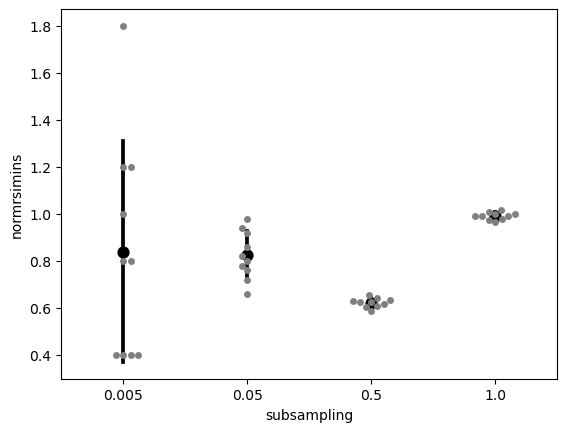

In [10]:
fig = plt.figure()
sns.pointplot(data=rsimins, x="subsampling", y="normrsimins", errorbar="sd",color='black', linestyles='none')
sns.swarmplot(data=rsimins, x="subsampling", y="normrsimins",color='gray') #hue='iteration',palette="gray")

plt.show()

fig.savefig("/ebio/abt6_projects/met1_somatic_transpositions/data/Figures/pltout_REV1/simins_2x_500ins.pdf")
#fig.savefig("/ebio/abt6_projects/met1_somatic_transpositions/data/Figures/pltout/simins_2x_500ins.pdf")

In [9]:
rsimins

,rsimins,subsampling,iteration
0,495,1.00,1
1,80,0.10,1
2,11,0.01,1
3,0,1.00,2
4,205,0.10,2
5,0,0.01,2
6,0,1.00,3
7,229,0.10,3
8,0,0.01,3
9,0,1.00,4
